# CME / Pencil Code

In [1]:
from CME_pipline import *
import pencil as pc

$ conda install -c plotly plotly-orca psutil requests


In [2]:
cfg = Config()

cfg.make_anim_hel = False
cfg.make_anim_mag = False
cfg.make_anim_hel_frac = False

In [3]:
sims = discover_sims(cfg.ROOT)
[s.name for s in sims]   # type: ignore
#target = "256_gamma3_new_source7_lambda1e12_k500"
target = "1024_gamma3_new_source7_k200b"
sim = [s for s in sims if s.name == target][0] # type: ignore

? WARNING: Couldnt load grid for /home/mgurgeni/programming/murman/CME/3D/1024_gamma3_new_source7
? WARNING: No simulation found in /home/mgurgeni/programming/murman/CME/3D/1024_gamma3_new_source7_k1000 -> try get_sims maybe?
? WARNING: Couldnt load grid for /home/mgurgeni/programming/murman/CME/3D/1024_gamma3_new_source7_k200
? WARNING: Couldnt load grid for /home/mgurgeni/programming/murman/CME/3D/1024_gamma3_new_source7_k200b
? WARNING: Couldnt load grid for /home/mgurgeni/programming/murman/CME/3D/1024_gamma3_new_source7_k200b_early
? WARNING: Couldnt load grid for /home/mgurgeni/programming/murman/CME/3D/1024_gamma3_new_source7_k500
? WARNING: Couldnt load grid for /home/mgurgeni/programming/murman/CME/3D/128_gamma3_new_source7_k3000
? WARNING: Couldnt load grid for /home/mgurgeni/programming/murman/CME/3D/128_gamma3_new_source7_lambda2e8_k1000
? WARNING: Couldnt load grid for /home/mgurgeni/programming/murman/CME/3D/256_gamma3_new_source7_lambda16e8_k500
? WARNING: Couldnt load g

Detected runs: ['1024_gamma3_new_source7_k200b']
appending hel_kin
appending hel_mag
appending sp
appending krms
appending mag
appending kin
powerhel_kin.dat


/home/mgurgeni/pencil-code/python/pencil/read/powers.py:388: UserWarning:

grid.dat not found. Assuming the box is cubical.



powerhel_mag.dat
power_sp.dat
power_krms.dat
power_mag.dat
power_kin.dat
Read 700 lines.
___________200.0_______________________
reading sim 1024_gamma3_new_source7_k200b:
average helicity at last timestep: 2.888999915739987e-05 
[1024_gamma3_new_source7_k200b] helicity_fraction_alltimes: EmA.shape[0]=22, len(tt_for_cmap)=22


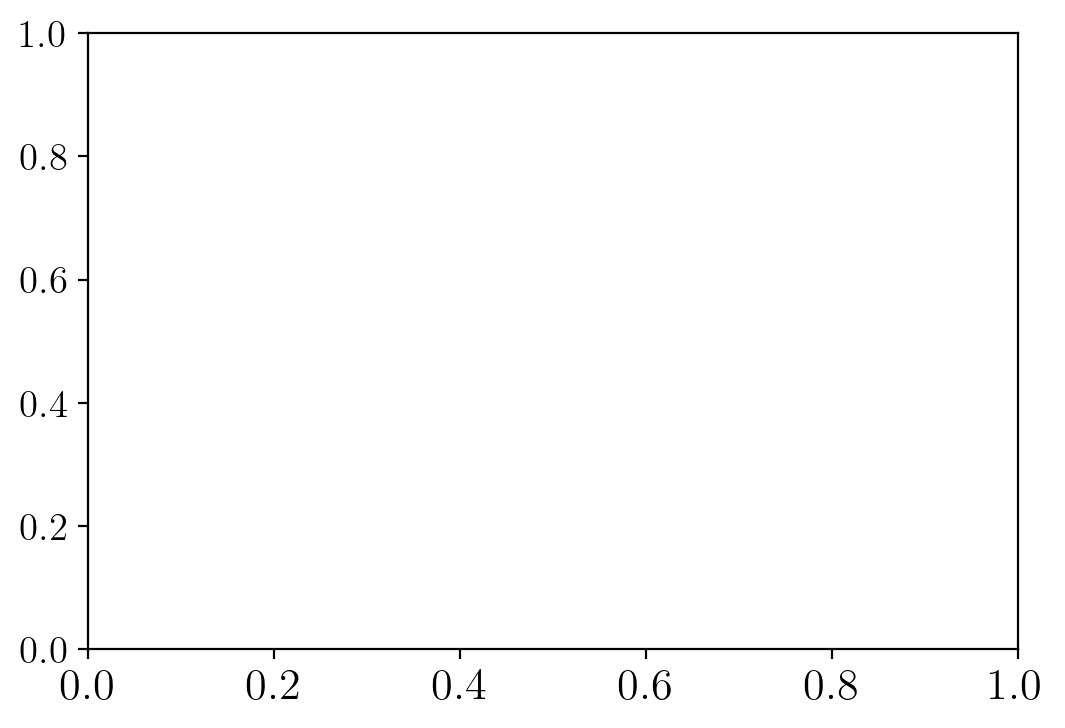

In [4]:
run_pipeline(cfg, sims_override=[sim]) # [sim] if you wnat to see something specific 

Read 5000 lines.
Read 6914 lines.
Read 6929 lines.
Read 33 lines.


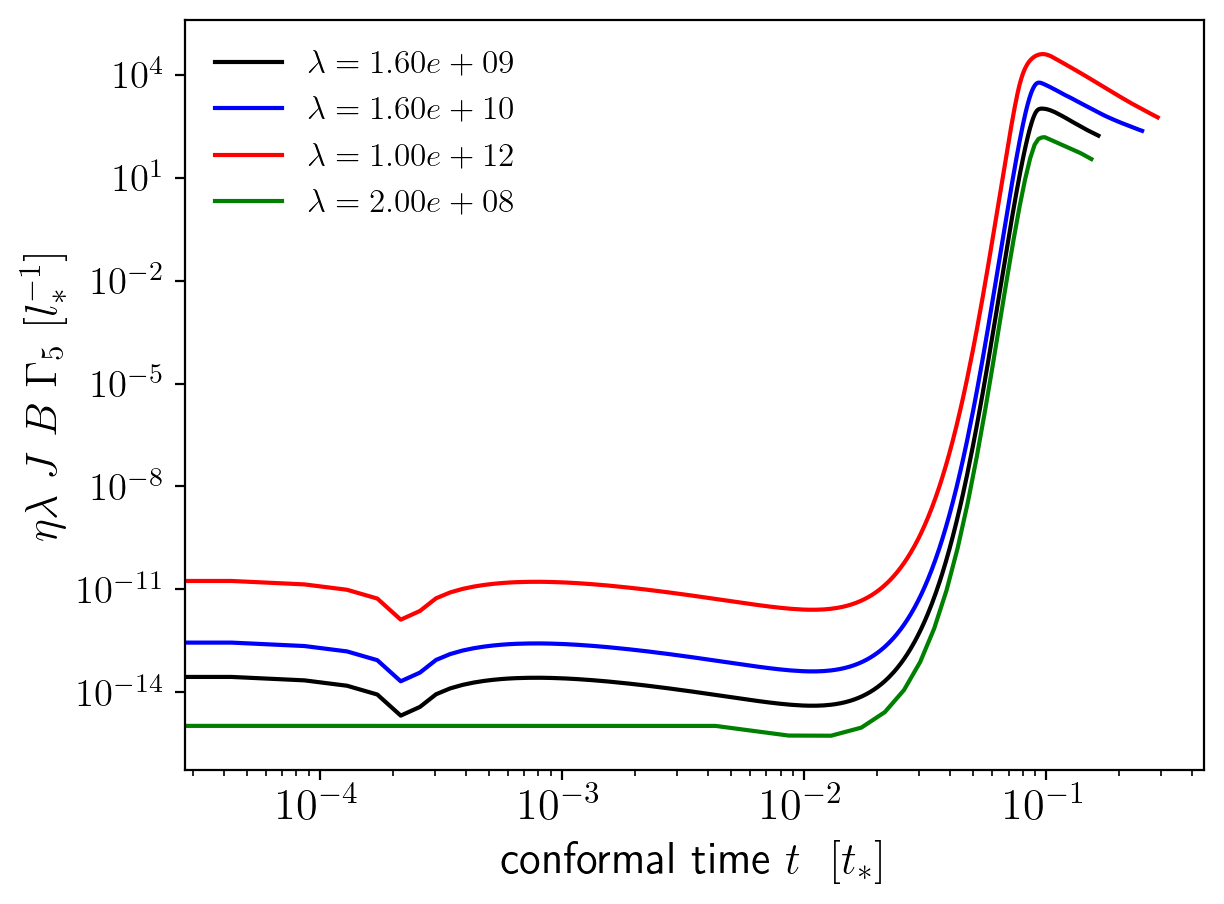

Read 5000 lines.
Read 6914 lines.
Read 6929 lines.
Read 33 lines.


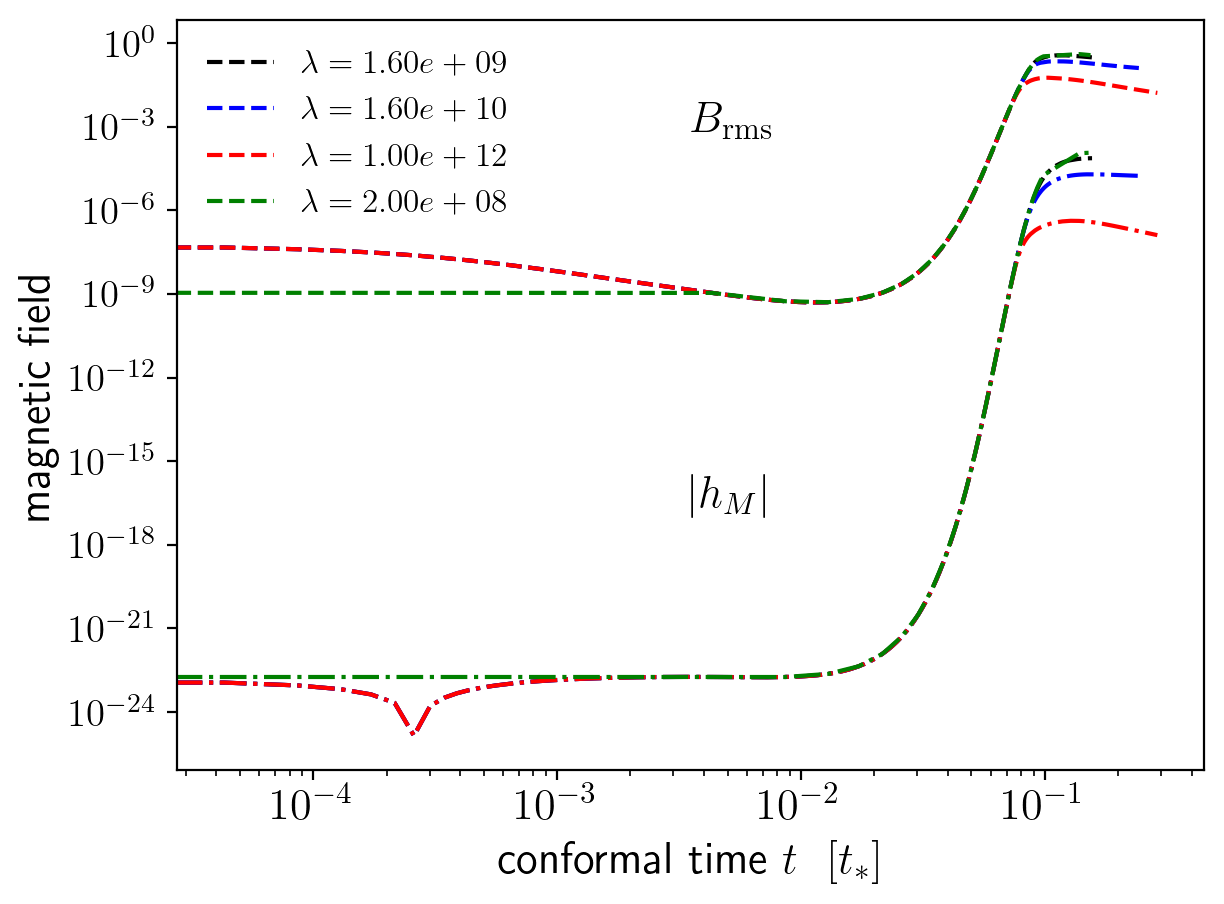

In [5]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

colors = ["black", "blue", "red", "green", "orange", "purple"]
color_cycle = itertools.cycle(colors)

lambda_to_color = {}

for sim in sims:
    if sim.name.startswith("256") and not any(x in sim.name for x in ["4e8", "8e8"]):
        pars = pc.read.param(datadir=sim.datadir, param2=True)
        lam = getattr(pars, "lambda5", None)
        if lam is not None and lam not in lambda_to_color:
            lambda_to_color[lam] = next(color_cycle)



plt.figure()
for sim in sims:
    if sim.name.startswith("256") and not any(x in sim.name for x in ["4e8", "8e8"]):
        ts   = pc.read.ts(datadir=sim.datadir)
        pars = pc.read.param(datadir=sim.datadir, param2=True)
        lam  = getattr(pars, "lambda5", None)
        eta  = getattr(pars, "eta", None)
        gamma = getattr(pars, "gammaf5", None)

        if lam is None: 
            continue

        color = lambda_to_color.get(lam, "gray")
        t = np.asarray(ts.t) - cfg.t_offset
        JBm = np.asarray(ts.jbm)

        plt.loglog(t, np.abs(lam * eta * (-JBm)) / gamma,
                   label=rf"$\lambda = {lam:.2e}$",
                   color=color)

plt.xlabel(r"conformal time $t~~[t_*]$")
plt.ylabel(r"$\eta\lambda ~J ~B ~\Gamma_5~[l_*^{-1}]$")
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots()
handles, labels = [], []

for sim in sims:
    if not sim.name.startswith("256") or any(x in sim.name for x in ["4e8", "8e8","2e2"]):
        continue

    ts   = pc.read.ts(datadir=sim.datadir)
    pars = pc.read.param(datadir=sim.datadir, param2=True)
    lam  = getattr(pars, "lambda5", None)

    if lam is None: 
        continue

    color = lambda_to_color.get(lam, "gray")

    t    = np.asarray(ts.t) - cfg.t_offset
    brms = np.asarray(ts.brms)
    hel  = np.asarray(ts.abm)

    hB, = ax.loglog(t, np.abs(brms), "--", color=color,
                    label=rf"$\lambda = {lam:.2e}$")
    ax.loglog(t, np.abs(hel), "-.", color=color)

    handles.append(hB)
    labels.append(rf"$\lambda = {lam:.2e}$")

ax.set_xlabel(r"conformal time $t~~[t_*]$")
ax.set_ylabel(r"magnetic field")
ax.legend(handles, labels, frameon=False)

ax.text(0.5, 0.85, r"$B_{\mathrm{rms}}$", transform=ax.transAxes)
ax.text(0.5, 0.35, r"$|h_M|$", transform=ax.transAxes)

plt.tight_layout()
plt.show()





In [6]:
sim = [s for s in sims if s.name == target][0] # type: ignore
ts = pc.read.ts(datadir=sim.datadir)
print(sim.name)
mu5m  = -np.max(ts.mu5m)
hel = np.mean(ts.abm[-1])
print(f"Average mu5m at last five timesteps: {mu5m}")
print(f"Final J.B: {hel}")

Read 700 lines.
1024_gamma3_new_source7_k200b
Average mu5m at last five timesteps: -39700.0
Final J.B: 2.863000008801464e-05


In [7]:
ELm2 = 1.97 * 10 ** (-21)  # G^2  Mpc a_0^3
G2d2 = 24.8  # Gev/cm^3

h_M = hel * ELm2 * G2d2 ## Gev/cm^3 Mpc a_0^3
h_M_G2d2 = hel * ELm2  ## G^2 Mpc a_0^3
print(f"h_M from simulations: {h_M}")
print(f"h_M / G2d2 from simulations in unites G^2 Mpc a_0^3: {h_M_G2d2}")

h_M from simulations: 1.3987472843000433e-24
h_M / G2d2 from simulations in unites G^2 Mpc a_0^3: 5.640110017338884e-26


In [8]:
g_fac = 1 # TODO: check g factor
Lam_fac = 1.2 * 10 ** (29) / 10** 8 # table 1
mu_fac = 3 * 10 ** (-14) * mu5m   # eq. 19
del_h = -1.13 * 10**(-36) * Lam_fac * mu_fac * g_fac  # Gev/cm^3 Mpc a_0^3 ## eq 13
print(f"del_h from estimation: {del_h}")

del_h from estimation: 1.6149959999999993e-24


In [9]:
colors = ["black", "blue", "red", "green", "orange", "purple"]
color_cycle = itertools.cycle(colors)

lambda_to_color = {}

for sim in sims:
    if sim.name.startswith("256") and not any(x in sim.name for x in ["4e8", "8e8"]):
        pars = pc.read.param(datadir=sim.datadir, param2=True)
        lam = getattr(pars, "lambda5", None)
        if lam is not None and lam not in lambda_to_color:
            lambda_to_color[lam] = next(color_cycle)


Read 700 lines.
Read 5000 lines.
Read 6914 lines.
Read 6929 lines.


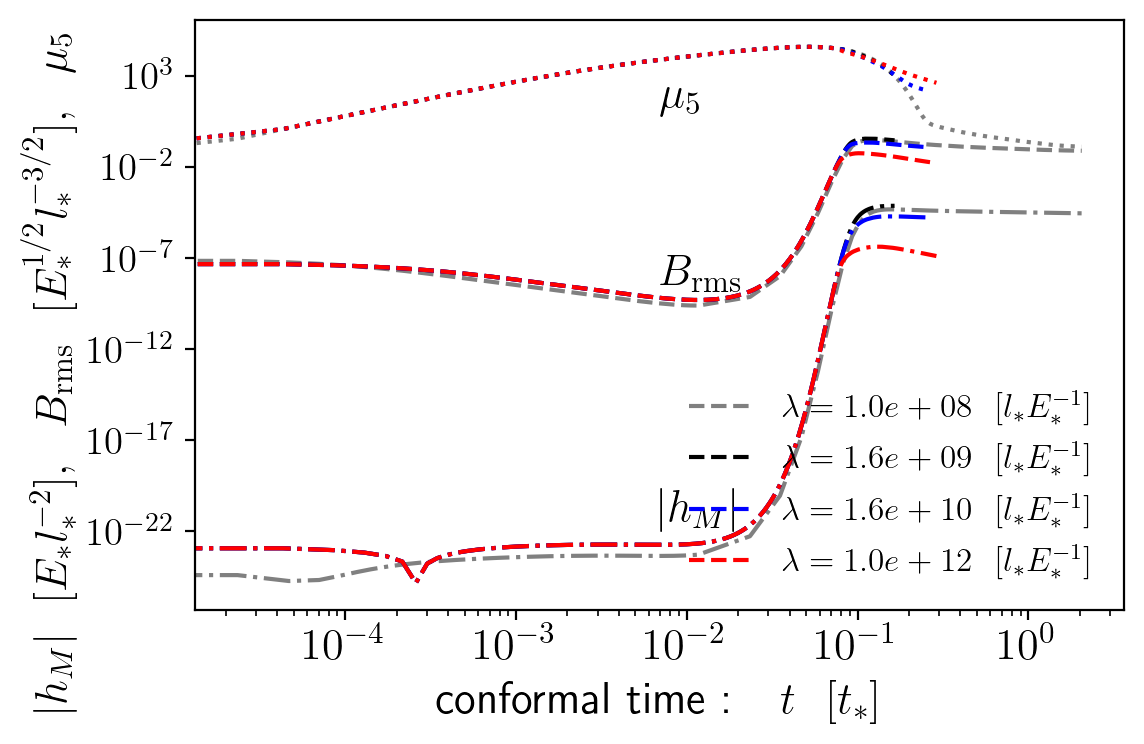

In [10]:
# One combined figure in the "Brms" style, but with multiple runs
fig, ax = plt.subplots(figsize=(6, 4))

handles, labels = [], []

for sim in sims:
    # same filtering you had
    if sim.name == "1024_gamma3_new_source7_k200b":
        pass
    elif (not sim.name.startswith("256")) or any(x in sim.name for x in ["4e8", "8e8", "2e8"]):
        continue

    ts   = pc.read.ts(datadir=sim.datadir)
    pars = pc.read.param(datadir=sim.datadir, param2=True)
    lam  = getattr(pars, "lambda5", None)

    if lam is None:
        continue

    color = lambda_to_color.get(lam, "gray")

    t    = np.asarray(ts.t) - cfg.t_offset
    brms = np.asarray(ts.brms)
    hel  = np.asarray(ts.abm)
    mu5 = np.asarray(ts.mu5m)

    # Match pipeline styles: Brms dashed, |h_M| dash-dot
    hB, = ax.loglog(t, np.abs(brms), "--", color=color,
                    label=rf"$\lambda = {lam:.2e}$")
    ax.loglog(t, np.abs(hel), "-.", color=color)
    ax.loglog(t, np.abs(mu5), ":", color=color,label = rf"$\lambda = {lam:.2e} ~~ [l_*E_*^{-1}]$")
    handles.append(hB)
    labels.append(rf"$\lambda = {lam:.1e}~~ [l_*E_*^{{-1}}]$")

# Axis labels identical to plot_ts_brms_and_hel
ax.set_xlabel(r"conformal time :~~ $t~~ [t_*]$")
ax.set_ylabel(r"$|h_M| ~~ [E_*l_*^{-2}],~~B_{\mathrm{rms}} ~~ [E_{*}^{1/2} l_*^{-3/2}],~~ \mu_5 ~~ [l_*^{-1}]$")

ax.legend(handles, labels, frameon=False, loc="lower right", fontsize=12)


# Optional annotations like in your custom figure:
ax.text(0.5, 0.55, r"$B_{\mathrm{rms}}$", transform=ax.transAxes)
ax.text(0.5, 0.15, r"$|h_M|$",       transform=ax.transAxes)
ax.text(0.5, 0.85, r"$\mu_5$",       transform=ax.transAxes)



plt.tight_layout()
plt.show()


In [11]:
# choose a synthetic "run name" for the comparison figure
run_label = "all_runs"

out_base = fig_path(cfg.FIG_DIR, run_label, "Brms_multi")[:-4]  # strip ".pdf"
export_for_slides(fig, out_base)


Read 5000 lines.
Read 6914 lines.
Read 6929 lines.


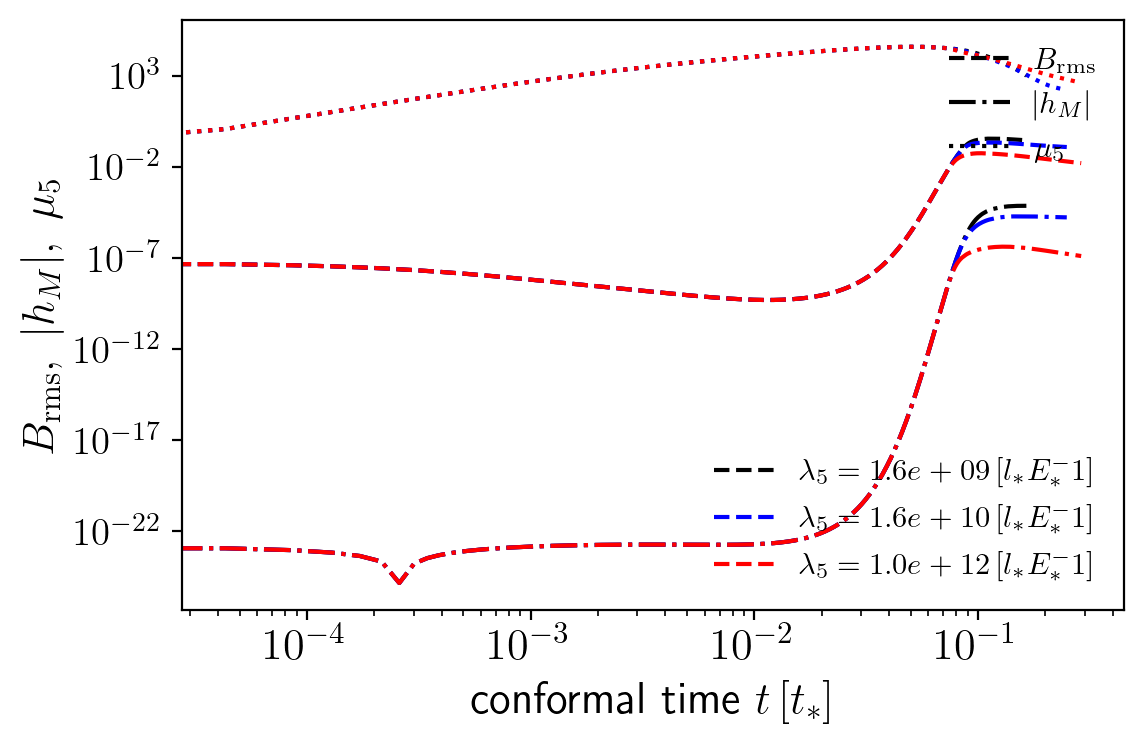

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(6, 4))

lambda_seen   = set()
handles_lam   = []
labels_lam    = []

for sim in sims:
    # same filtering you had
    if sim.name == "1024_gamma3_new_source7_k200b":
        continue
    if (not sim.name.startswith("256")) or any(x in sim.name for x in ["4e8", "8e8", "2e8"]):
        continue

    ts   = pc.read.ts(datadir=sim.datadir)
    pars = pc.read.param(datadir=sim.datadir, param2=True)
    lam  = getattr(pars, "lambda5", None)
    if lam is None:
        continue

    color = lambda_to_color.get(lam, "gray")

    t    = np.asarray(ts.t) - cfg.t_offset
    brms = np.asarray(ts.brms)
    hel  = np.asarray(ts.abm)
    mu5  = np.asarray(ts.mu5m)

    # Match "Brms" style: Brms dashed, |h_M| dash-dot, mu5 dotted
    # No labels here; we’ll build legends manually.
    hB,   = ax.loglog(t, np.abs(brms), "--", color=color)
    hHel, = ax.loglog(t, np.abs(hel),  "-.", color=color)
    hMu5, = ax.loglog(t, np.abs(mu5),  ":",  color=color)

    # One entry per unique lambda in the lambda legend
    if lam not in lambda_seen:
        handles_lam.append(hB)  # any line with this color is fine
        labels_lam.append(rf"$\lambda_5 = {lam:.1e}\, [l_* E_*^{-1}]$")
        lambda_seen.add(lam)

# Axis labels
ax.set_xlabel(r"conformal time $t\,[t_*]$")
ax.set_ylabel(r"$B_{\mathrm{rms}},~|h_M|,~\mu_5$")

# Legend 1: colors ↔ lambda_5
leg1 = ax.legend(handles_lam, labels_lam, frameon=False,
                 loc="lower right", fontsize=11)

# Legend 2: linestyles ↔ which field
style_handles = [
    Line2D([0], [0], ls="--", color="k"),
    Line2D([0], [0], ls="-.", color="k"),
    Line2D([0], [0], ls=":",  color="k"),
]
style_labels = [
    r"$B_{\mathrm{rms}}$",
    r"$|h_M|$",
    r"$\mu_5$",
]

leg2 = ax.legend(style_handles, style_labels,
                 frameon=False, loc="upper right", fontsize=11)

# Make sure both legends are shown
ax.add_artist(leg1)

plt.tight_layout()
plt.show()


32_gamma3_new_source7_lambda2e8_k500_ts_0
Read 200 lines.
['keys', 'run', 'cvsid', 'ip', 'xyz0', 'xyz1', 'lxyz', 'lperi', 'lpole', 'ncoarse', 'lshift_origin', 'lshift_origin_lower', 'coord_system', 'lconcurrent', 'nt', 'it1', 'it1start', 'it1d', 'itspec', 'itsnap', 'it_rmv', 'dt', 'dt0', 'dt_epsi', 'dt_ratio', 'cdt', 'ddt', 'dt_incr', 'lfractional_tstep_advance', 'lfractional_tstep_negative', 'leps_fixed', 'cdtv', 'cdtv2', 'cdtv3', 'cdtsrc', 'cdts', 'cdtr', 'cdtf', 'cdtc', 'isave', 'itorder', 'dsnap', 'dsnap_down', 'mvar_down', 'maux_down', 'd1davg', 'd2davg', 'dvid', 'dsound', 'dtmin', 'dspec', 'tmax', 'toutoff', 'lit1_logspacing', 'tmax_logspacing', 'iwig', 'ldivu_perp', 'allproc_print', 'ssmask1', 'ssmask2', 'dtracers', 'dfixed_points', 'unit_system', 'unit_length', 'unit_velocity', 'unit_density', 'unit_temperature', 'unit_magnetic', 'awig', 'ialive', 'max_walltime', 'dtmax', 'ldt_paronly', 'lspec_start', 'lspec_at_tplusdt', 'vel_spec', 'mag_spec', 'uxy_spec', 'bxy_spec', 'jxbxy_sp

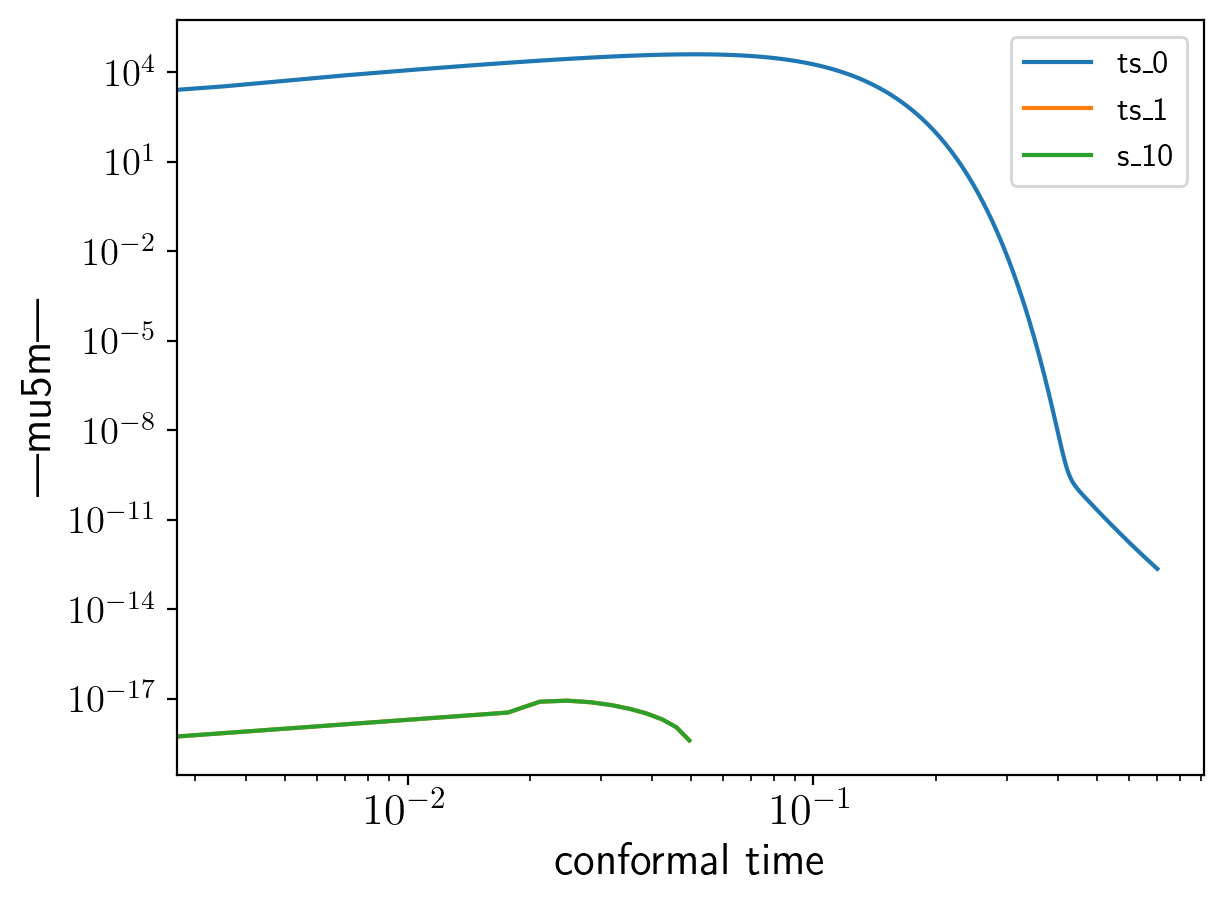

In [13]:
for sim in sims:
    if sim.name.startswith("32"):
        print(sim.name)
        par1 = pc.read.param(datadir=sim.datadir, param1=True)
        par2 = pc.read.param(datadir=sim.datadir, param2=True)
        ts = pc.read.ts(datadir=sim.datadir)
        t = np.asarray(ts.t) - cfg.t_offset
        mu5m = np.asarray(ts.mu5m)
        print(par2.keys)
        print(ts.t[-10:])
        plt.loglog(t - par1.tstart, np.abs(mu5m), label=sim.name[-4:])
plt.xlabel("conformal time")
plt.ylabel("|mu5m|")
plt.legend()
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1024_gamma3_new_source7_k200b
Read 700 lines.
factor: 0.1


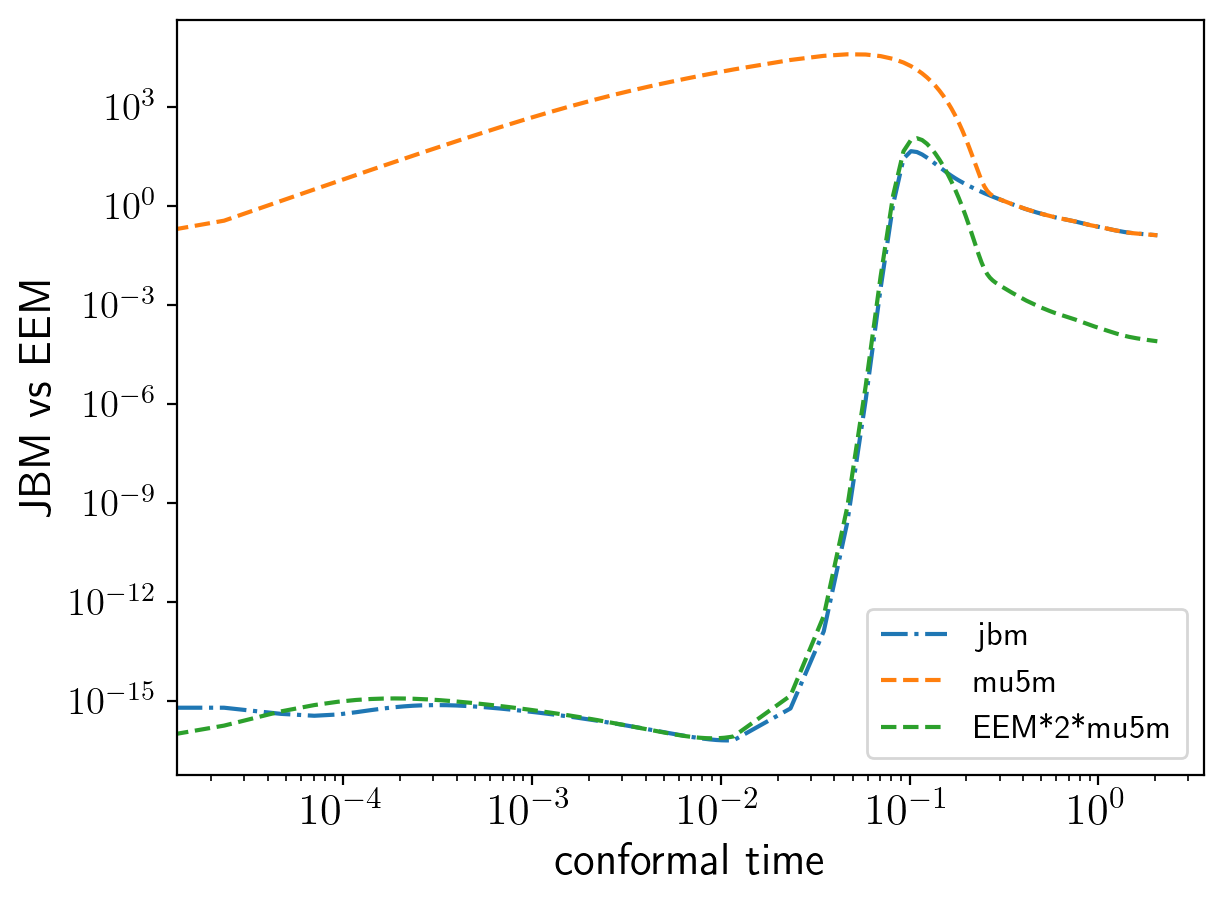

In [ ]:
for sim in sims:
    if sim.name.startswith("1024") and sim.name.endswith("k200b"):
        print(sim.name)
        par1 = pc.read.param(datadir=sim.datadir, param1=True)
        par2 = pc.read.param(datadir=sim.datadir, param2=True)
        ts = pc.read.ts(datadir=sim.datadir)
        t = np.asarray(ts.t) - cfg.t_offset
        mu5m = np.asarray(ts.mu5m)
        factor  = par2.eta * par2.lambda5 / par2.gammaf5
        print(f'factor: {factor}')
        ## chack if jbm vs EEM and wich one is bigger
        # --- IGNORE ---
        jbm = np.asarray(ts.jbm)
        eem = np.asarray(2*ts.EEM * ts.mu5m)
        plt.loglog(t, factor * np.abs(jbm),"-." , label=r"jbm * \eta*\lambda/\gamma_5")
        plt.loglog(t, np.abs(mu5m),"--" , label=r"mu5m")
        plt.loglog(t, factor * np.abs(eem),"--" , label=r"EEM*2*mu5m *\eta*\lambda/\gamma_5")
        #plt.loglog(t, jbm - eem, label=sim.name[-4:]+"_diff")
        # --- IGNORE ---
    plt.xlabel("conformal time")
    plt.ylabel("JBM vs EEM")
    plt.legend()
    plt.tight_layout() 